In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

from pandas_profiling import ProfileReport

In [41]:
df = pd.read_csv('2021-Oct-Indicator-values.csv')
print(df)

df2=df.pivot_table(index='hour_stump', columns='_unit', values='avg_value')
df3=df.pivot_table(index='hour_stump', columns='miner_model', values='avg_value')
# df2=df.unstack()
print(df2)



            hour_stump miner_model  datacenter_id  lancium_box_id  \
0         10/1/21 0:00         NaN              1             NaN   
1         10/1/21 0:00        A851              1             NaN   
2         10/1/21 0:00        A851              1             NaN   
3         10/1/21 0:00        M30S              1             NaN   
4         10/1/21 0:00        M30S              1             NaN   
...                ...         ...            ...             ...   
450433  10/31/21 23:55         NaN              5             NaN   
450434  10/31/21 23:55         S19              6             NaN   
450435  10/31/21 23:55         S19              6             NaN   
450436  10/31/21 23:55         NaN              6             NaN   
450437  10/31/21 23:55         NaN              6             NaN   

        datacenter_room_id  power_meter_id     avg_value              _unit  
0                      NaN             NaN  4.058000e+01                USD  
1              

In [15]:
df = pd.read_csv('_2021_datacenter_5_site_nov_indicators__202205181159.csv', infer_datetime_format=True)

In [ ]:
df1 = df.groupby(['hour_stump', 'power_meter_id']).sum()

result = pd.pivot_table(df, values='avg_value', index='hour_stump', aggfunc={'avg_value': np.sum})

# result = pd.concat([df, df1], axis=0)
# result1 = pd.merge(df, df1, how='left', on='hour_stump')

# df2=df.pivot_table(index='hour_stump', columns=['unit'], values='avg_value', aggfunc=np.sum)

In [ ]:
report_2 = ProfileReport(df2)
report_2

In [ ]:
report_3 = ProfileReport(df3)
report_3

In [61]:
df2=df.pivot_table(index=['hour_stump', 'datacenter_id'], columns='_unit', values='avg_value')

# sns.set_theme(style='darkgrid')

# sns.lineplot(x='hour_stump', y='degree_Fahrenheit',
#             data=df2)

In [62]:
datacenter_1=df2.query('datacenter_id == 1')

In [5]:
df = pd.read_csv('2021_datacenter_5_site_oct_indicators_pivot__202205182248.csv', infer_datetime_format=True)
df1 = pd.read_csv('2021_datacenter_5_site_nov_indicators_pivot__202205182248.csv', infer_datetime_format=True)
df2 = pd.read_csv('2021_datacenter_5_dcr_2_s9_oct_indicators__202205182248.csv', infer_datetime_format=True)
df3 = pd.read_csv('2021_datacenter_5_dcr_2_s9_nov_indicators__202205182248.csv', infer_datetime_format=True)


In [6]:
dfoct=pd.merge(df, df2, on="hour_stump")


In [7]:
dfnov=pd.merge(df1, df3, on='hour_stump')

In [ ]:
report_oct = ProfileReport(dfoct)
report_oct

In [ ]:
report_nov = ProfileReport(dfnov)
report_nov

In [8]:
dfoct.columns

Index(['hour_stump', 'datacenter_id_x', 'pm_26973_freq', 'pm_26973_mw',
       'pm_26973_kw', 'pm_26974_freq', 'pm_26974_mw', 'pm_26974_kw',
       'pm_74059_freq', 'pm_74059_mw', 'pm_74059_kw', 'usd', 'temp_f',
       'rel_humidity', 'datacenter_id_y', 'datacenter_room_id', 'miner_model',
       'gigahash/second', 'miner_count'],
      dtype='object')

In [9]:
dfoct['Power'] = df['pm_26973_mw'] + df['pm_26974_mw'] + df['pm_74059_mw']
dfoct.columns

Index(['hour_stump', 'datacenter_id_x', 'pm_26973_freq', 'pm_26973_mw',
       'pm_26973_kw', 'pm_26974_freq', 'pm_26974_mw', 'pm_26974_kw',
       'pm_74059_freq', 'pm_74059_mw', 'pm_74059_kw', 'usd', 'temp_f',
       'rel_humidity', 'datacenter_id_y', 'datacenter_room_id', 'miner_model',
       'gigahash/second', 'miner_count', 'Power'],
      dtype='object')

In [10]:
dfnov.columns

Index(['hour_stump', 'datacenter_id_x', 'pm_26973_freq', 'pm_26973_mw',
       'pm_26973_kw', 'pm_26974_freq', 'pm_26974_mw', 'pm_26974_kw',
       'pm_74059_freq', 'pm_74059_mw', 'pm_74059_kw', 'usd', 'temp_f',
       'rel_humidity', 'datacenter_id_y', 'datacenter_room_id', 'miner_model',
       'gigahash/second', 'miner_count'],
      dtype='object')

In [11]:
dfnov['Power'] = df['pm_26973_mw'] + df['pm_26974_mw'] + df['pm_74059_mw']
dfnov.columns

Index(['hour_stump', 'datacenter_id_x', 'pm_26973_freq', 'pm_26973_mw',
       'pm_26973_kw', 'pm_26974_freq', 'pm_26974_mw', 'pm_26974_kw',
       'pm_74059_freq', 'pm_74059_mw', 'pm_74059_kw', 'usd', 'temp_f',
       'rel_humidity', 'datacenter_id_y', 'datacenter_room_id', 'miner_model',
       'gigahash/second', 'miner_count', 'Power'],
      dtype='object')

In [12]:
dfoct_new = dfoct.drop(['pm_26973_freq', 'pm_26973_mw',
       'pm_26973_kw', 'pm_26974_freq', 'pm_26974_mw', 'pm_26974_kw',
       'pm_74059_freq', 'pm_74059_mw', 'pm_74059_kw', 'temp_f',
       'rel_humidity', 'datacenter_id_y'], axis=1)

In [13]:
dfnov_new = dfnov.drop(['pm_26973_freq', 'pm_26973_mw',
       'pm_26973_kw', 'pm_26974_freq', 'pm_26974_mw', 'pm_26974_kw',
       'pm_74059_freq', 'pm_74059_mw', 'pm_74059_kw', 'temp_f',
       'rel_humidity', 'datacenter_id_y'], axis=1)

In [14]:
dfoct_newi = dfoct_new.sort_values('hour_stump')
dfnov_newi = dfnov_new.sort_values('hour_stump')

In [23]:
dfoct_dc5 = dfoct_newi.set_index('hour_stump')
dfnov_dc5 = dfnov_newi.set_index('hour_stump')
dfoct_dc5 = dfoct_dc5.dropna(0)
dfnov_dc5 = dfnov_dc5.dropna(0)

/var/folders/25/1st06df16wj_drlv8cczhqs40000gn/T/ipykernel_69090/2876544971.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dfoct_dc5 = dfoct_dc5.dropna(0)
/var/folders/25/1st06df16wj_drlv8cczhqs40000gn/T/ipykernel_69090/2876544971.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  dfnov_dc5 = dfnov_dc5.dropna(0)


In [ ]:
report_oct = ProfileReport(dfoct_dc5)
report_oct

In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

ImportError: cannot import name 'LinearRegression' from 'sklearn' (/Users/hermanoferreira/miniconda3/envs/sr_data/lib/python3.9/site-packages/sklearn/__init__.py)

In [24]:
y = dfoct_dc5['Power']
x = dfoct_dc5.drop(['datacenter_id_x', 'datacenter_room_id', 'miner_model','Power'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle=True)

In [29]:
LR = linear_model.LinearRegression(normalize=True)
LR.fit(x_train, y_train)

/Users/hermanoferreira/miniconda3/envs/sr_data/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [27]:
y_prediction = LR.predict(x_test)
y_prediction

array([108.24317138, 108.31612195, 108.2041038 , 108.31748365,
       108.43185914, 108.26752838, 108.23906749, 108.29465995,
       108.36350167, 108.26713545, 108.30456467, 108.31848178,
       108.36294317, 108.33269956, 108.27258765, 108.29015749,
       108.34876042, 108.27839126, 108.315517  , 108.27603725,
       108.30073493, 108.25846679, 108.32095414, 108.19382428,
       108.26482227, 108.24002268, 108.27989321, 108.33794523,
       108.33508357, 108.28695253, 108.30432905, 108.2260598 ,
       108.40794409, 108.24865529, 108.29788946, 108.40149472,
       108.33020462, 108.37383166, 108.36733072, 108.28931657,
       108.31035148, 108.35207673, 108.23660085, 108.16320088,
       108.22811176, 108.190949  , 108.28811845, 108.27805052,
       108.26245517, 108.25160801, 108.32621989, 108.28182158,
       108.29664404, 108.23717018, 108.22834555, 108.34500301,
       108.33512739, 108.32196629, 108.40743307, 108.23956324,
       108.27039919, 108.28935729, 108.16557765, 108.30

/Users/hermanoferreira/miniconda3/envs/sr_data/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Power'>

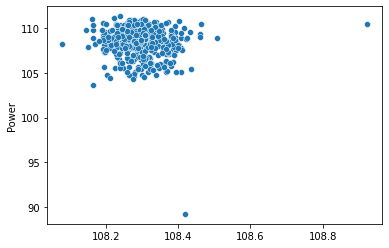

In [31]:
sns.scatterplot(y_prediction, y_test)

In [28]:
score=r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  -0.006326661117859622
mean_sqrd_error is== 3.0931199277390236
root_mean_squared error of is== 1.758726791670333
